#  [Simple Two Hidden Layer Deep Learning]


Epoch 1/10
1500/1500 [==============================] - 10s 5ms/step - loss: 0.2686 - accuracy: 0.9221 - val_loss: 0.1397 - val_accuracy: 0.9568
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1105 - accuracy: 0.9662 - val_loss: 0.1073 - val_accuracy: 0.9674
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0758 - accuracy: 0.9765 - val_loss: 0.1009 - val_accuracy: 0.9706
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0572 - accuracy: 0.9824 - val_loss: 0.0928 - val_accuracy: 0.9733
Epoch 5/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0453 - accuracy: 0.9849 - val_loss: 0.0957 - val_accuracy: 0.9732
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0357 - accuracy: 0.9884 - val_loss: 0.0886 - val_accuracy: 0.9757
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0309 - accuracy: 0.9898 - val_loss: 0.0878 - val_accurac

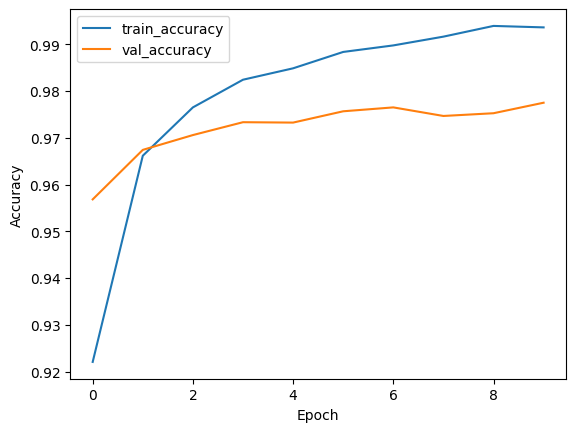

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[ 971    1    0    1    1    0    3    1    2    0]
 [   0 1127    2    1    0    0    2    1    2    0]
 [   2    0 1015   10    1    0    0    2    1    1]
 [   0    0    8  996    0    1    0    2    1    2]
 [   0    1    5    1  960    0    3    0    1   11]
 [   2    0    0   11    0  870    4    1    2    2]
 [   3    1    2    1    5    6  938    0    2    0]
 [   0    4   10    7    0    0    0 1001    0    6]
 [   3    0    3   16    1    4    2    2  941    2]
 [   1    4    1   10    7    5    0    8    3  970]]


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Preprocess the MNIST dataset and split into training and testing sets
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Step 2: Scale pixel intensities to the 0-1 range and convert to floats
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Flatten the images for the neural network
X_train_flat = X_train_full.reshape(X_train_full.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_flat, y_train_full, test_size=0.2, random_state=42)

# Step 3: Implement a two hidden layer neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model on the training data
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Step 5: Evaluate the model's performance on the testing data
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Step 6: Analyze and discuss the results, including accuracy, confusion matrix, and any observed limitations.
# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Generate predictions
y_pred = np.argmax(model.predict(X_test_flat), axis=-1)

# Calculate and display confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_mat}')


Epoch 1/20
1500/1500 [==============================] - 10s 5ms/step - loss: 0.2987 - accuracy: 0.9147 - val_loss: 0.1752 - val_accuracy: 0.9471
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1343 - accuracy: 0.9593 - val_loss: 0.1301 - val_accuracy: 0.9603
Epoch 3/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0926 - accuracy: 0.9723 - val_loss: 0.1185 - val_accuracy: 0.9637
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0714 - accuracy: 0.9774 - val_loss: 0.0984 - val_accuracy: 0.9693
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0555 - accuracy: 0.9827 - val_loss: 0.1037 - val_accuracy: 0.9707
Epoch 6/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0444 - accuracy: 0.9861 - val_loss: 0.0942 - val_accuracy: 0.9730
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0352 - accuracy: 0.9890 - val_loss: 0.1071 - val_accurac

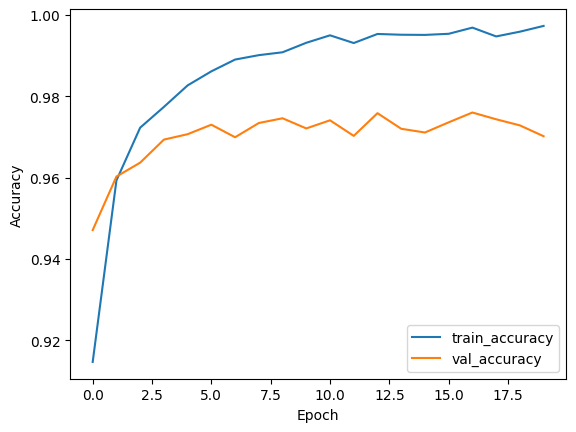

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[ 956    0    3    2    0    1    6    7    5    0]
 [   0 1120    2    7    0    1    2    1    2    0]
 [   0    1  983   25    2    1    3   10    6    1]
 [   0    0    1  990    0    6    0    3    4    6]
 [   0    0    3    1  940    0    7    9    2   20]
 [   1    0    0   22    0  852    2    3    8    4]
 [   3    4    1    0    4    7  934    0    5    0]
 [   2    2    8    4    0    0    0 1001    1   10]
 [   0    1    7   17    1    1    2    7  934    4]
 [   2    3    0   10    2    3    1   11    2  975]]


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Preprocess the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale pixel intensities to the 0-1 range and convert to floats
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Flatten the images for the neural network
X_train_flat = X_train_full.reshape(X_train_full.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_flat, y_train_full, test_size=0.2, random_state=42)

# Experiment with different hyperparameters and architectures
# You can adjust these values based on your experiments
epochs = 20
hidden_units = [128, 64, 32]  # Updated to three hidden layers
learning_rate = 0.001
optimizer = 'adam'  # You can experiment with 'sgd', 'momentum', 'rmsprop', 'adam', etc.
activation_function = 'tanh'  # You can experiment with 'relu', 'sigmoid', 'tanh', etc.

# Implement a three hidden layer neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(hidden_units[0], activation=activation_function, input_shape=(784,)),
    tf.keras.layers.Dense(hidden_units[1], activation=activation_function),
    tf.keras.layers.Dense(hidden_units[2], activation=activation_function),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model with the chosen optimizer and learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

# Evaluate the model's performance on the testing data
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Generate predictions
y_pred = np.argmax(model.predict(X_test_flat), axis=-1)

# Calculate and display confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_mat}')


# [Convolutional Neural Network (CNN)]

Epoch 1/10
625/625 [==============================] - 263s 420ms/step - loss: 1.9676 - accuracy: 0.3011 - val_loss: 1.7835 - val_accuracy: 0.3686
Epoch 2/10
625/625 [==============================] - 240s 383ms/step - loss: 1.6859 - accuracy: 0.4084 - val_loss: 1.5886 - val_accuracy: 0.4397
Epoch 3/10
625/625 [==============================] - 249s 398ms/step - loss: 1.5462 - accuracy: 0.4559 - val_loss: 1.4953 - val_accuracy: 0.4624
Epoch 4/10
625/625 [==============================] - 246s 394ms/step - loss: 1.4476 - accuracy: 0.4902 - val_loss: 1.3874 - val_accuracy: 0.5128
Epoch 5/10
625/625 [==============================] - 243s 389ms/step - loss: 1.3707 - accuracy: 0.5186 - val_loss: 1.3497 - val_accuracy: 0.5214
Epoch 6/10
625/625 [==============================] - 249s 399ms/step - loss: 1.3087 - accuracy: 0.5416 - val_loss: 1.3000 - val_accuracy: 0.5404
Epoch 7/10
625/625 [==============================] - 249s 398ms/step - loss: 1.2540 - accuracy: 0.5591 - val_loss: 1.2457 -

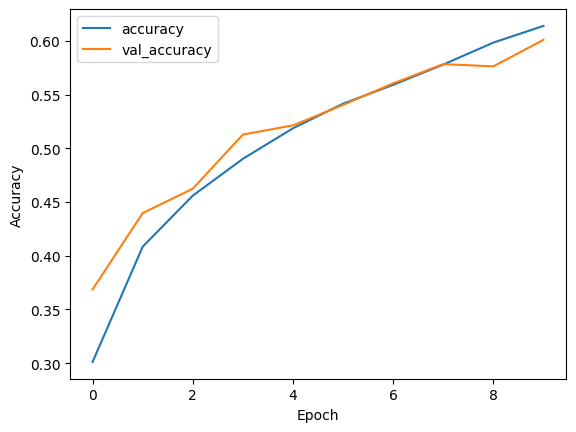

In [3]:
# Import necessary libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. Data Preprocessing

# Load CIFAR-10 dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0

# Split dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# 2. Build a Convolutional Neural Network

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='tanh', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='tanh'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='tanh'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 3. Compile and Train the Model

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# 4. Evaluate the Model

# Evaluate on testing dataset
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_test_classes = y_test.flatten()

# Create confusion matrix and classification report
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
class_report = classification_report(y_test_classes, y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualize training process
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/10
1250/1250 [==============================] - 217s 171ms/step - loss: 1.4958 - accuracy: 0.4589 - val_loss: 1.2032 - val_accuracy: 0.5680
Epoch 2/10
1250/1250 [==============================] - 216s 172ms/step - loss: 1.1060 - accuracy: 0.6075 - val_loss: 1.0764 - val_accuracy: 0.6183
Epoch 3/10
1250/1250 [==============================] - 218s 174ms/step - loss: 0.9147 - accuracy: 0.6795 - val_loss: 0.9886 - val_accuracy: 0.6557
Epoch 4/10
1250/1250 [==============================] - 214s 171ms/step - loss: 0.7790 - accuracy: 0.7262 - val_loss: 0.8848 - val_accuracy: 0.6962
Epoch 5/10
1250/1250 [==============================] - 218s 174ms/step - loss: 0.6678 - accuracy: 0.7655 - val_loss: 0.8738 - val_accuracy: 0.7029
Epoch 6/10
1250/1250 [==============================] - 206s 165ms/step - loss: 0.5588 - accuracy: 0.8052 - val_loss: 0.9153 - val_accuracy: 0.6928
Epoch 7/10
1250/1250 [=======================

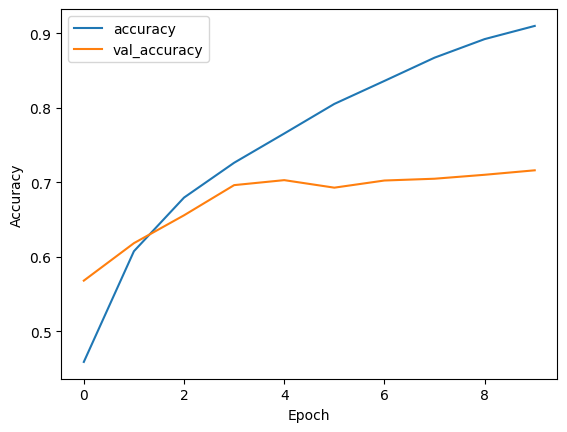

In [1]:
# Step 5: Fine-Tuning
# Import necessary libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. Data Preprocessing

# Load CIFAR-10 dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0

# Split dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# 2. Build a Convolutional Neural Network

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 3. Compile and Train the Model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# 4. Evaluate the Model

# Evaluate on testing dataset
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_test_classes = y_test.flatten()

# Create confusion matrix and classification report
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
class_report = classification_report(y_test_classes, y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualize training process
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
